## Clone Repository

In [1]:
!git clone https://github.com/IceKhoffi/chicken-health-behavior-multimodal

Cloning into 'chicken-health-behavior-multimodal'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (115/115), done.
remote: Compressing objects: 100% (110/110), done.
remote: Total 115 (delta 26), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (115/115), 3.71 MiB | 3.90 MiB/s, done.
Resolving deltas: 100% (26/26), done.


In [18]:
#Initialize Path to Cloned Git
main_path = '/content/chicken-health-behavior-multimodal'

## Install Requirements

In [3]:
!python --version

Python 3.11.13


In [4]:
!pip install -r "{main_path}/requirements.txt"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 103.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.5/161.5 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [6]:
from huggingface_hub import hf_hub_download
from ultralytics import YOLO
import os

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## DEMO : chicken-object-detection-yolov11s

https://huggingface.co/IceKhoffi/chicken-object-detection-yolov11s

In [11]:
# Define each Hugging Face details
repo_id_detection = "IceKhoffi/chicken-object-detection-yolov11s"
filename_detection = "yolov11s.pt"
model_path_detection = hf_hub_download(repo_id=repo_id_detection, filename=filename_detection)

yolov11s.pt:   0%|          | 0.00/19.2M [00:00<?, ?B/s]

In [12]:
# Load the trained model weights
model = YOLO(model_path_detection)

In [13]:
test_image = 'image_test.jpg'
test_picture_path = hf_hub_download(repo_id=repo_id_detection, filename=test_image)

image_test.jpg:   0%|          | 0.00/36.5k [00:00<?, ?B/s]

In [14]:
# Perform inference on an image
results = model(test_picture_path)


image 1/1 /root/.cache/huggingface/hub/models--IceKhoffi--chicken-object-detection-yolov11s/snapshots/37c760681b16dcd6c1f404746933939a2dccf4e5/image_test.jpg: 384x640 59 0s, 56.3ms
Speed: 9.5ms preprocess, 56.3ms inference, 296.6ms postprocess per image at shape (1, 3, 384, 640)


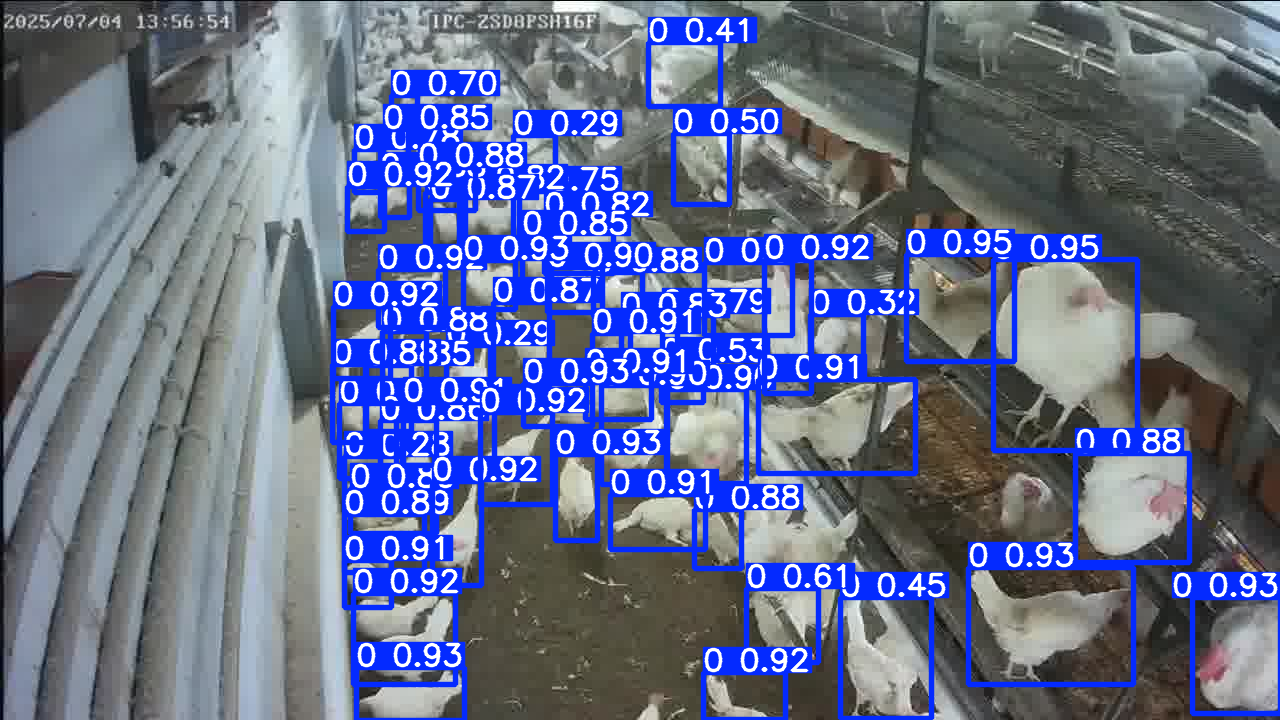

In [15]:
result_image_object = results[0]
result_image_object.show()

In [16]:
test_video = "video_test.mp4"
test_video_path = hf_hub_download(repo_id=repo_id_detection, filename=test_video)

video_test.mp4:   0%|          | 0.00/21.8M [00:00<?, ?B/s]

### Distance Estimation

In [20]:
!python "{main_path}/utils/distance_estimation.py" --video_input {test_video_path} --video_output output_distance.mp4 --model_path {model_path_detection}


0: 384x640 62 0s, 51.1ms
Speed: 4.5ms preprocess, 51.1ms inference, 155.2ms postprocess per image at shape (1, 3, 384, 640)
Processed frame 1 | Time: 2.082s

0: 384x640 61 0s, 10.9ms
Speed: 2.0ms preprocess, 10.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
Processed frame 2 | Time: 0.046s

0: 384x640 61 0s, 10.8ms
Speed: 2.6ms preprocess, 10.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
Processed frame 3 | Time: 0.028s

0: 384x640 60 0s, 12.4ms
Speed: 1.8ms preprocess, 12.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)
Processed frame 4 | Time: 0.028s

0: 384x640 60 0s, 10.8ms
Speed: 2.1ms preprocess, 10.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
Processed frame 5 | Time: 0.024s

0: 384x640 60 0s, 10.8ms
Speed: 1.8ms preprocess, 10.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
Processed frame 6 | Time: 0.025s

0: 384x640 60 0s, 10.8ms
Speed: 2.1ms preprocess, 10.8ms infe

### Density Estimation

In [21]:
!python "{main_path}/utils/density_estimation.py" --video_input {test_video_path} --video_output output_density.mp4 --model_path {model_path_detection}


0: 384x640 62 0s, 84.3ms
Speed: 3.8ms preprocess, 84.3ms inference, 182.8ms postprocess per image at shape (1, 3, 384, 640)
Processed frame | Time: 2.597s

0: 384x640 61 0s, 11.3ms
Speed: 2.5ms preprocess, 11.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)
Processed frame | Time: 0.035s

0: 384x640 61 0s, 12.3ms
Speed: 2.5ms preprocess, 12.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)
Processed frame | Time: 0.034s

0: 384x640 60 0s, 17.0ms
Speed: 2.2ms preprocess, 17.0ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)
Processed frame | Time: 0.041s

0: 384x640 60 0s, 14.0ms
Speed: 2.2ms preprocess, 14.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)
Processed frame | Time: 0.033s

0: 384x640 60 0s, 11.4ms
Speed: 2.1ms preprocess, 11.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)
Processed frame | Time: 0.031s

0: 384x640 60 0s, 13.6ms
Speed: 2.0ms preprocess, 13.6ms inference, 2.2ms

## DEMO : chicken-vocalization-classifier

https://huggingface.co/IceKhoffi/chicken-vocalization-classifier

In [22]:
repo_id_classifier = "IceKhoffi/chicken-vocalization-classifier"
filename_classifier = "Chicken_CNN_Disease_Detection_Model.pth"
weight_path = hf_hub_download(repo_id=repo_id_classifier, filename=filename_classifier)

In [23]:
audio_test = 'audio_test.mp3'
test_audio_path = hf_hub_download(repo_id=repo_id_classifier, filename=audio_test)

In [24]:
!python "{main_path}/utils/vocalization_prediction.py" --audio_input {test_audio_path} --model_path {weight_path}

Predicted class: Healthy

Class Probabilities:
Healthy: 77.60%
Noise: 0.79%
Unhealthy: 21.60%
